In [273]:
import os
import numpy as np
import math
import random
from PIL import Image

class PPM2grey:
    def __init__(self):
        
            #Global variable to hold 2-D arrays Edge images formed by applying Sobel filter
        
            self.dximg=None  #for holding x-gradient, not normalized Edge image array from Sobel–Feldman operator
            self.dyimg=None  #for holding y-gradient, not normalized Edge image array from Sobel–Feldman operator
            
            
            self.height = 0 #for holding height of the original image
            self.width =0 #for holding width of the original image
            
            
            #------------------for experimental purpose----------------------
            
            #to copy array with float values in self.exp_dximg to use later in combining both gradients
            self.exp_dximg=None
            self.dxready=False #to know the status of self.exp_dximg

            #to copy array with float values in self.exp_dyimg to use later in combining both gradients
            self.exp_dyimg=None               
            self.dyready=False #to know the status of self.exp_dximg


    def pgm_read(self,file):
            '''
            pgm_read module reads pgm file and returns 2-D array of float type
            '''
        
            #Importing pgm image file using PIL module 
            real_image=Image.open(file)
            
            #Converting ppm image file into 2-D array using numpy module with float values of 16 bits each
            
            real_image_arr=np.asarray(real_image,dtype=np.float16)
            real_arr=real_image_arr.copy()
            
            #getting the height and width of the pgm image
            shape = real_image_arr.shape
            self.height = shape[0]
            self.width =  shape[1]

            
            return real_arr


    def pgm_conv(self,image_array, Gradient):
        
        '''
        pgm_conv module reads 2-D array return by pgm_read
        and applies X-gradient or Y-gradient Sobel–Feldman operator, 
        according to the input 'x' or 'y' respectively, and 
        returns float type array according to the input Gradient type i.e. x or y.
        '''
        
        #--x_sobel and y_sobel are two separate 1-D kernels for Sobel–Feldman operator, rather than one 2-D kernel--

        
        if Gradient=='x':
        #--x_sobel and y_sobel, for kernel rows and columns respectively--

                    
                    x_sobel=[-1,0,1]
                    y_sobel=[1,2,1]
                    
        elif Gradient=='y':
        #--x_sobel and y_sobel, for kernel rows and columns respectively--

                    x_sobel=[1,2,1]
                    y_sobel=[-1,0,1]
        else:
            return


            
            
            
        #--creating a copy of the 2-D array of Float type for holding array values after applying row kernel
        X_buffer = image_array.copy()
            
            
        #--creating a copy of the 2-D array of Float type for holding array values after applying column kernel
        Y_buffer = image_array.copy()
            
            
            
        #-----x_sobel kernel values= [1,2,1]-------
        for i in range(1,self.height-1):
                    Left=0
                    up=0
                    Right=0
                    
                    for j in range(1,self.width-1):
                        
                        Left= (image_array[i][j-1] * x_sobel[0])
                        current= (image_array[i][j] * x_sobel[1])
                        Right= (image_array[i][j+1] * x_sobel[2])
                        
                        val= (Left + current + Right)
                        
                        X_buffer[i][j]= val
                        
                        
        #X_buffer array of float type is obtained after applying x_sobel(row kernel) on original image array    
        #X_buffer array would be used as input array for applying y_sobel(column kernel)
          
        #-----y_sobel kernel values= [-1,0,1]-------
        for i in range(1,self.height-1):
                    up= 0
                    current= 0
                    down= 0
                    for j in range(1,self.width-1):
                        
                        up= (X_buffer[i-1][j] * y_sobel[0])
                        current= (X_buffer[i][j] * y_sobel[1])
                        down= (X_buffer[i+1][j] * y_sobel[2])
                        
                        val= up +current+ down

                        Y_buffer[i][j]= val
                        
                        
         #Y_buffer array of float type is obtained after applying y_sobel(column kernel) on X_buffer  
     

        if Gradient=='x':
                #for holding x-gradient, not normalized Edge image array from Sobel–Feldman operator
                #Y_buffer array of float type is converted to 8-bit unisigned integer 
                
                self.exp_dximg=Y_buffer.copy()#copying Y_buffer float values in self.exp_dximg to use later in combining both gradients
                self.dximg = Y_buffer.astype(np.uint8)
                
            
                self.dxready=True
                
        elif Gradient=='y':
                #for holding y-gradient, not normalized Edge image array from Sobel–Feldman operator
                #Y_buffer array of float type is converted to 8-bit unisigned integer 
                
                
                self.exp_dyimg=Y_buffer.copy() #copying Y_buffer float values in self.exp_dyimg to use later in combining both gradients
                
                self.dyimg= Y_buffer.astype(np.uint8)
                self.dyready=True
        
        #Y_buffer array of float type return of gradient provided as an input 

        return Y_buffer


 
    def pgm_normalize(self, image_array):
            '''
            pgm_normalize module reads the 2-D array and scale the values of the given array between 0-255
            and returns the array in 8 bit unsigned integer type
            '''
            old_max=image_array.max() #maximum value in input array
            old_min=image_array.min() #minimum value in input array
            old_range=old_max - old_min #range of values of input array

            new_min=0.0 #target minimum
            new_max=255.0 #target maximum
            new_range=new_max - new_min # target range
            


            for i in range(1,self.height-1):
                    for j in range(1,self.width-1):
                            old_val= image_array[i][j]
                            scale=(old_val-old_min)/old_range
                            
                            new_val=(new_range*scale)+new_min
                            image_array[i][j]= int(new_val) #converting the scaled value between 0.0 and 255.0 into integer type
                            
            image_array = image_array.astype(np.uint8)
            return image_array
 


    #---------------------EXPERIMENTAL METHOD pgm_gradientCombine------------------------------------------------------
    def pgm_gradientCombine(self):

        if self.dxready and self.dyready:
             buffer=np.array(self.exp_dximg, dtype=object)
             for i in range(1,self.height-1):
                    for j in range(1,self.width-1):
                            #combining both horizontal and vertical gradients
                            val=abs(self.exp_dximg[i][j]) +abs(self.exp_dyimg[i][j])
                            buffer[i][j]=val

             return buffer #returns the combined gradients array
                        
           
    
            
    def pgm_write(self ,image_array, file_name):            
            
            #creating an output file for pgm greyscale image
            pgm_grey = file_name
            
            
            #opening the output file in Output directory 
            #os.getcwd() returns current working directory, this program would work for linux and macos 
            #as /Output/ has forward slash and windows operating system uses backward slash
            file= os.getcwd()+'/Output/'+file_name
            fout_pgm=open(file,'wb')

            
            # define PGM Header with magic number P5
            pgmHeader = 'P5' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting pgmheader from 'string' type to 'byte', and writing it in the output file
            fout_pgm.write(pgmHeader.encode())


            image_array.tofile(fout_pgm)
            
            fout_pgm.close()
    
    #---------------------EXPERIMENTAL METHOD pgm_write------------------------------------------------------
    '''
        Method is used to output the output combine.ppm file to show edges in little bit of glitter form using 
        random decimal weight ranges between 0.10 and 0.90, which is multiplied with the value got by combining
        x and y gradients.
    '''
    def ppm_write(self , file_name):            
        if  self.dxready and self.ready:
            buffer=np.zeros((self.height,self.width,3),dtype=np.uint8)
            
            for i in range(1,self.height-1):
                    for j in range(1,self.width-1):
                            val=abs(self.exp_dximg[i][j]) +abs(self.exp_dyimg[i][j]) #combining both x and y gradients
                            
                            buffer[i][j][0]=val*(round(random.uniform(0.10,0.90), 2)) #for red channel
                            buffer[i][j][1]=val*(round(random.uniform(0.10,0.90), 2)) #for green channel
                            buffer[i][j][2]=val*(round(random.uniform(0.10,0.90), 2)) #for blue channel

            image_array=buffer
            
            #opening the output file in Output directory 
            #os.getcwd() returns current working directory, this program would work for linux and macos 
            #as /Output/ has forward slash and windows operating system uses backward slash
            file= os.getcwd()+'/Output/'+file_name
            fout_pgm=open(file,'wb')

            
            # define PPM Header with magic number P6
            ppmHeader = 'P6' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting pgmheader from 'string' type to 'byte', and writing it in the output file
            fout_pgm.write(ppmHeader.encode())


            image_array.tofile(fout_pgm)
            
            fout_pgm.close()
        else:
            return 
        
        
        
        
        
        
    def pgm_free(self):
        ''' pgm_free module for deleting all output files, not the memory occupied for arrays,
            as python has garbage collector
        '''
        try:
            os.remove('Output/dxgrey.pgm')

        except:
            print('dxgrey.pgm does not exist!')
        try:
            os.remove('Output/dygrey.pgm')

        except:
            print('dygrey.pgm does not exist!')
        try:
            os.remove('Output/ndxgrey.pgm')
        except:
            print('ndxgrey.pgm does not exist!')
        try:
             os.remove('Output/ndygrey.pgm')        
        except:
            print('ndygrey.pgm does not exist!')
            
        try:
             os.remove('Output/combine.pgm')  
             self.dxready=False
             self.dyready=False
        except:
             print('combine.pgm does not exist!')
        try:
             os.remove('Output/combine.ppm')  
             self.dxready=False
             self.dyready=False
        except:
             print('combine.ppm does not exist!')


            


        
            
if __name__=='__main__':
    #assigning file location to file
    file='Images/baboon.pgm'
    
    #creating a PPM2grey() object to operate all image operations using it
    new_obj=PPM2grey()
    
    #allocate image of given size
    gimg = new_obj.pgm_read(file)
    
    # convolve the giving image array, by applying both x and y gradient
    ndximg= new_obj.pgm_conv(gimg, 'x') #unnormalized array of edges, after applying x gradient kernel
    ndyimg= new_obj.pgm_conv(gimg, 'y') #unnormalized array of edges, after applying y gradient kernel
    
    #copy edge image array and normalize, for visualization purposes
    
    #normalizing the unnormalized array of edges got after applying x gradient kernel
    ndximg=new_obj.pgm_normalize(ndximg)
    new_obj.pgm_write(ndximg,'ndxgrey.pgm') #output the normalized pgm file in Output directory

    #normalizing the unnormalized array of edges got after applying y gradient kernel
    ndyimg=new_obj.pgm_normalize(ndyimg)
    new_obj.pgm_write(ndyimg,'ndygrey.pgm') #output the normalized pgm file in Output directory
    
    
    #output to file
    new_obj.pgm_write(new_obj.dximg, "dxgrey.pgm") #output the unnormalized pgm file in Output directory
    new_obj.pgm_write(new_obj.dyimg, "dygrey.pgm") #output the unnormalized pgm file in Output directory
    
    
    
    #----------Experimental------------------------------------------------------------------------------------
    

    combine_array=new_obj.pgm_gradientCombine() #returns array after combining both x and y gradient as array of float type 
    comb_norm=new_obj.pgm_normalize(combine_array) #return array after normalizing its value between 0-255
    
    
    new_obj.ppm_write(comb_norm,'combine.ppm') #outputs the file combining x and y gradient as ppm file type
    
    new_obj.pgm_write(comb_norm,'combine.pgm') #outputs the file combining  x and y gradient as pgm file type 

    

    

        

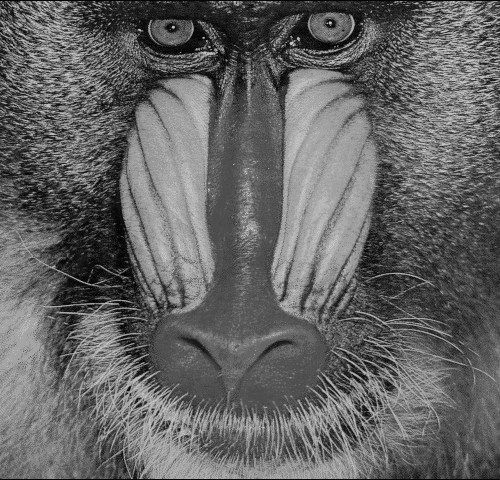

In [274]:
#orignal image, User can change the file name, if they want to see other image
Image.open('Images/baboon.pgm')

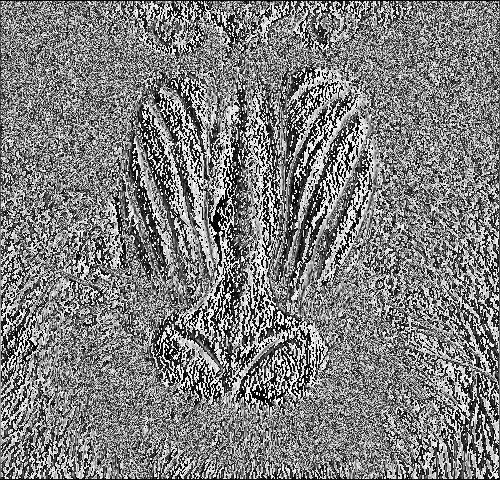

In [275]:
#Result for unnormalized image array after applying x gradient kernel
Image.open('Output/dxgrey.pgm')

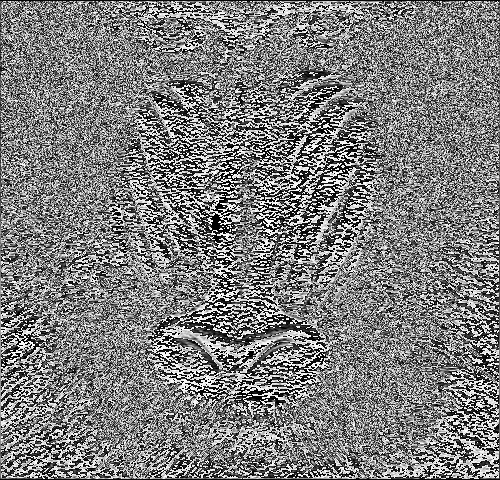

In [276]:
#Result for unnormalized image array after applying y gradient kernel
Image.open('Output/dygrey.pgm')

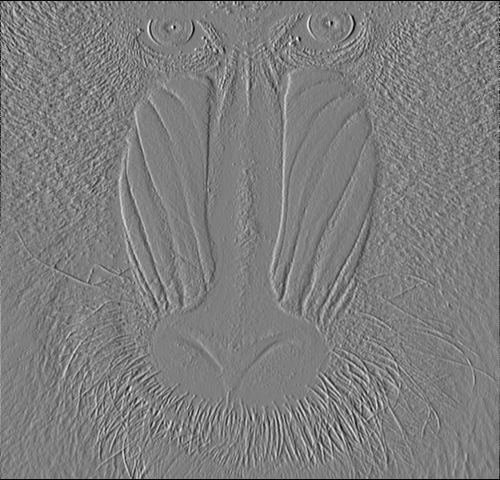

In [277]:
#Result for normalized image array after applying x gradient kernel
Image.open('Output/ndxgrey.pgm')

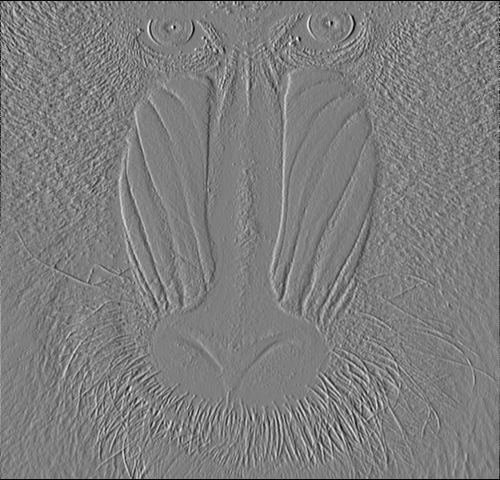

In [278]:
#Result for normalized image array after applying y gradient kernel
Image.open('Output/ndxgrey.pgm')

In [ ]:
#---------------------EXPERIMENTAL------------------------------------

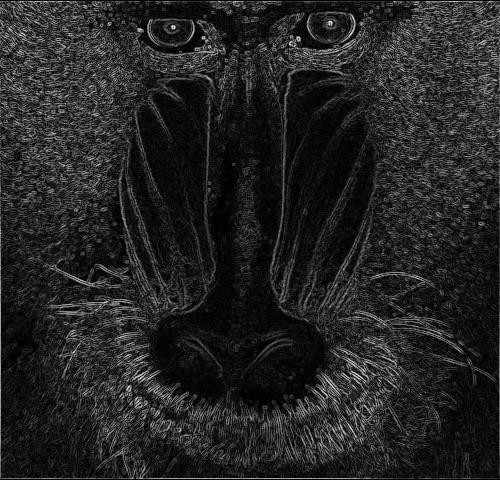

In [279]:
#after combining x and y gradient and outputing as pgm file
Image.open('Output/combine.pgm')

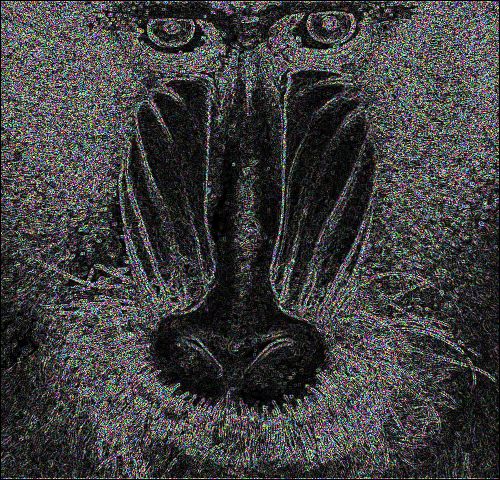

In [280]:
#After combining x and y gradient and outputing as ppm file
Image.open('Output/combine.ppm')

In [230]:
#for deleting all output files and reseting flags 
new_obj.pgm_free()